**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [47]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
seaborn.set_context('talk')
import missingno as msno

In [48]:
# La instalación de decouple daba error, por lo que tuvimos que desinstalarla e instalarla nuevamente como python-decouple

#pip uninstall decouple
!pip install python-decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#from decouple import config

# Collecting python-decouple
#  Downloading python_decouple-3.6-py3-none-any.whl (9.9 kB)
# Installing collected packages: python-decouple
# Successfully installed python-decouple-3.6

from sqlalchemy import create_engine, text

In [50]:
# La versión más nueva es 5.5.0, por lo que por las dudas instalamos la versión requerida:
!pip install plotly==4.14.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [52]:
# Creación DF con la información de Ventas de Melbourne
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [53]:
# Creación DF con la información scrappeada de AirBnb
interesting_cols = ['description', 'neighborhood_overview', 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price', 'latitude', 'longitude']
airbnb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_cols)
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



### Creación de Base de Datos

In [71]:
engine = create_engine('sqlite:///mb_db', echo=True)
connection = engine.connect()

Engine(sqlite:///mb_db)

### Ingestión de Datos

#### Tabla melbourne

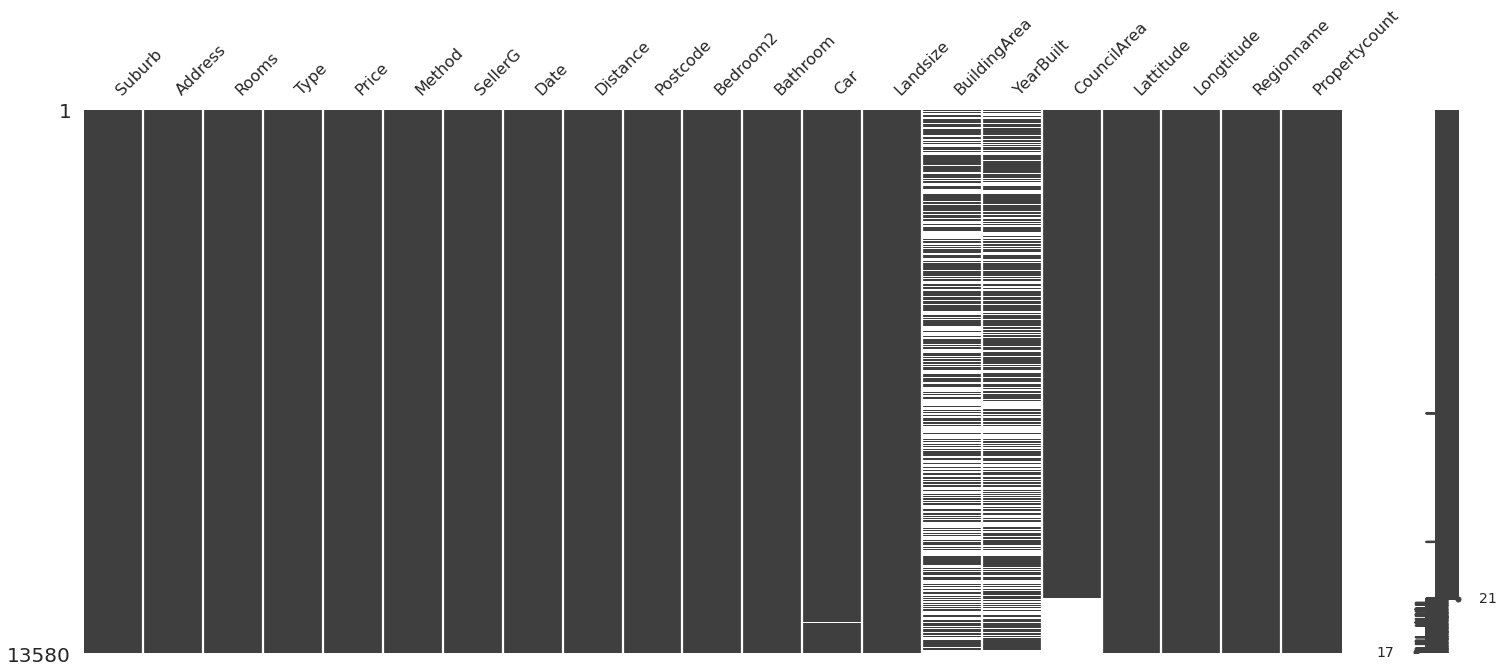

In [57]:
msno.matrix(melb_df)

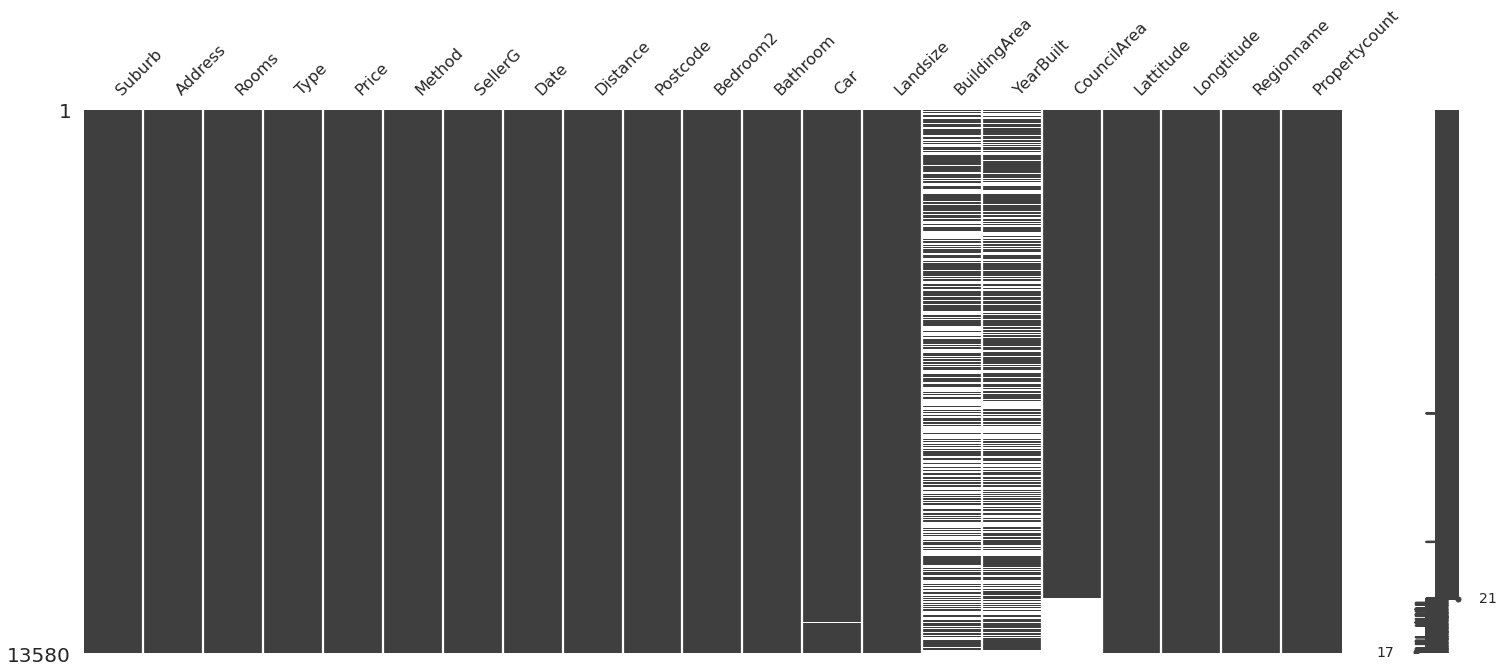

In [56]:
# Completar CouncilArea con las variables Latitud y Longitud
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tp1")

melb_completed_df = melb_df.copy()
empty_councilarea = melb_completed_df[melb_completed_df.CouncilArea.isnull()==True]
# TODO? Sería mas eficiente guardar solo el indice y no todo el dataframe

for ind in empty_councilarea.index:
  coordenadas = str(melb_completed_df['Lattitude'][ind]) + ", " + str(melb_completed_df['Longtitude'][ind])
  councilArea = geolocator.reverse(coordenadas) # Llamo a la API para obtener los datos sobre la dirección a partir de las coordenadas geográficas
  try:
    if int(melb_completed_df['Postcode'][ind]) == int(councilArea.raw['address']['postcode']):
      melb_completed_df.loc[[ind],['CouncilArea']] = councilArea.raw['address']['suburb']
  except:
    # print(councilArea.raw)

msno.matrix(melb_completed_df)
# Finalmente ahora si cortamos el DataFrame con los CouncilArea que no pudimos recuperar a partir de las coordenadas, por no coincidir con el postcode

melb_completed_df = melb_completed_df[melb_completed_df.CouncilArea.isnull()==False]

# Para bajar el archivo ya corregido
#melb_completed_df.to_csv('melb_completed_df.csv', index=None)
#from google.colab import files
#files.download('melb_completed_df.csv') 

In [63]:
###################################### QUITAR!!!!! ##########################################
###################################### QUITAR!!!!! ##########################################
###################################### QUITAR!!!!! ##########################################


# ATAJO para no corregir los CouncilArea y cargarlo ya competado
url = 'https://drive.google.com/file/d/1TTNArP_0BV23Lw-UzDv_bPtf5vmhOQbB/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
melb_completed_df = pandas.read_csv(path)

In [82]:
# Carga del DF melbourne al motor SQL
if engine.dialect.has_table(connection, 'melbourne'): #engine.dialect.get_table_names(connection)
  connection.execute('DROP TABLE melbourne')
melb_completed_df.to_sql('melbourne',engine)

2022-06-05 20:04:56,588 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-05 20:04:56,592 INFO sqlalchemy.engine.Engine [raw sql] ()


['airbnb', 'melbourne']

#### Tabla airbnb

In [84]:
# Conversión de la variable zipcode a formato numérico
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df['zipcode'], errors='coerce')

### Exploración de los campos suburb y neighborhood con valores NaN o NULL del DF AirBNB

# Conteo de filas con el campo neigborhood NULL
neighborhood_null = airbnb_df.neighborhood.isnull().value_counts()
print(neighborhood_null)

# Conteo de filas con el campo suburb NULL
suburb_null = airbnb_df.suburb.isnull().value_counts()
print(suburb_null)

# Observación gráfica de los valores NULL
msno.matrix(airbnb_df)

# Se decide eliminar los campos con muchos faltantes de datos
airbnb_df.drop(['neighborhood_overview', 'neighborhood'], axis = 1, inplace=True)

# Comprobación
msno.matrix(airbnb_df)

# Finalmente creo la tabla en la base de datos
if engine.dialect.has_table(connection, 'airbnb'):
  connection.execute('DROP TABLE airbnb')
airbnb_df.to_sql('airbnb', engine)

,description,street,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...","Bulleen, VIC, Australia",Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,"Brunswick East, VIC, Australia",Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,"St Kilda, VIC, Australia",Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","Thornbury, VIC, Australia",Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,"St Kilda East, VIC, Australia",Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station","Carlton, VIC, Australia",Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...","Melton South, VIC, Australia",Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...","Glen Waverley, VIC, Australia",Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN
22893,Immaculately presented and carefully maintaine...,"Southbank, VIC, Australia",Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN


### Consultas de Exploración de Datos

In [20]:
### REQUERIMENTO ###

# 1) Cantidad de registros totales por ciudad.
# 2) Cantidad de registros totales por barrio y ciudad.

query1 = 'SELECT COUNT(1) as "Cantidad de Melbourne" FROM melbourne'
query2 = 'SELECT COUNT(1) as "Cantidad de AirBNB" FROM airbnb'
query3 = 'SELECT * FROM melbourne limit 10'
query4 = 'SELECT * FROM airbnb limit 10'
query5 = 'SELECT city, COUNT(1) as Cantidad FROM airbnb GROUP BY city ORDER BY count(1) DESC'
query6 = 'SELECT city, suburb, COUNT(1) as Cantidad FROM airbnb GROUP BY city, suburb HAVING count(1) > 100 ORDER BY count(1) DESC' # por ciudad y barrio
query7 = 'SELECT COUNT(1) as "Cantidad de Pares Ciudad-Barrio" FROM (SELECT DISTINCT city, suburb FROM airbnb GROUP BY city, suburb)' # por ciudad y barrio
query8 = 'SELECT CouncilArea, COUNT(1) FROM melbourne GROUP BY CouncilArea HAVING COUNT(1) > 100 ORDER BY COUNT(1) DESC'
query9 = 'SELECT CouncilArea, Suburb, COUNT(1) FROM melbourne GROUP BY CouncilArea, Suburb ORDER BY COUNT(1) DESC LIMIT 100' # por ciudad y barrio
query10 = 'SELECT COUNT(1) as "Cantidad de Pares Ciudad-Barrio" FROM (SELECT Suburb FROM melbourne GROUP BY Suburb HAVING COUNT(1) > 100 ORDER BY COUNT(1) DESC)' # por ciudad y barrio

queries = [query6, query7]
# queries = [query5, query6, query61, query7, query71, query72]

for query in queries:
  print(f'\n{query}')
  result = connection.execute(query)
  print(result.keys())
  for row in result:
    print(row)



SELECT city, suburb, COUNT(1) as Cantidad FROM airbnb GROUP BY city, suburb HAVING count(1) > 100 ORDER BY count(1) DESC
2022-06-05 18:08:15,791 INFO sqlalchemy.engine.Engine SELECT city, suburb, COUNT(1) as Cantidad FROM airbnb GROUP BY city, suburb HAVING count(1) > 100 ORDER BY count(1) DESC
2022-06-05 18:08:15,797 INFO sqlalchemy.engine.Engine [raw sql] ()
RMKeyView(['city', 'suburb', 'Cantidad'])
('Melbourne', 'Melbourne', 3850)
('Melbourne', 'Southbank', 1190)
('Port Phillip', 'Saint Kilda', 802)
('Stonnington', 'South Yarra', 790)
('Melbourne', 'Docklands', 612)
('Yarra', 'Richmond', 570)
('Melbourne', 'Carlton', 531)
('Moreland', 'Brunswick', 434)
('Yarra', 'Fitzroy', 375)
('Melbourne', 'North Melbourne', 340)
('Port Phillip', 'Melbourne', 330)
('Port Phillip', 'Elwood', 325)
('Yarra', 'Collingwood', 295)
('Darebin', 'Northcote', 279)
('Port Phillip', 'South Melbourne', 278)
('Melbourne', 'West Melbourne', 263)
('Stonnington', 'Prahran', 261)
('Yarra', 'Abbotsford', 257)
('Por

### Consultas Combinando las dos Fuentes
Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

In [21]:
query11 = 'SELECT distinct CAST(Postcode as INT), count(1) as "Cantidad Melbourne"  FROM melbourne GROUP BY CAST(Postcode as INT) ORDER BY count(1) DESC LIMIT 20'
query12 = 'SELECT count(distinct CAST(Postcode as INT)) as "Cantidad Melbourne"  FROM melbourne'
query13 = 'SELECT distinct CAST(zipcode as INT), count(1) as "Cantidad AirBNB" FROM airbnb GROUP BY CAST(zipcode as INT) ORDER BY count(1) DESC LIMIT 20'
query14 = 'SELECT count(distinct CAST(zipcode as INT)) as "Cantidad AirBNB" FROM airbnb'
query15 = 'SELECT count(DISTINCT CAST(Postcode as INT)) as "C.P. en ambos" FROM melbourne WHERE CAST(Postcode as INT) in (SELECT DISTINCT CAST(zipcode as INT) FROM airbnb)'
query16 = 'SELECT count(DISTINCT CAST(zipcode as INT)) as "C.P. en ambos" FROM airbnb WHERE CAST(zipcode as INT) in (SELECT DISTINCT CAST(Postcode as INT) FROM melbourne)'
query17 = """
SELECT count(1) as 'Cantidad de ZipCodes que están en ambas tablas' 
FROM (SELECT DISTINCT CAST(Postcode as INT) as Code FROM melbourne) melbourne_grouped
JOIN (SELECT DISTINCT CAST(zipcode as INT) as Code FROM airbnb) airbnb_grouped
ON melbourne_grouped.Code = airbnb_grouped.Code
"""
# Agrego la condición HAVING > 10 en el agrupamiento para tomar sólo codigos con información relevante. Las coincidencias bajan a 138 Codigos
query18 = """
SELECT (melbourne_grouped.Melbourne_Qtty + airbnb_grouped.Airbnb_Qtty) as 'Total Registros', ' - ',melbourne_grouped.*, ' - ', airbnb_grouped.*
FROM (SELECT DISTINCT CAST(Postcode as INT) as Melbourne_Code, count(1) as Melbourne_Qtty, AVG(Price) as 'Melbourne_Avg_Price' FROM melbourne GROUP BY CAST(Postcode as INT) HAVING count(1) > 10) melbourne_grouped
JOIN (SELECT DISTINCT CAST(zipcode as INT) as Airbnb_Code, count(1) as Airbnb_Qtty, AVG(price) as 'Airbnb_Avg_Price' FROM airbnb GROUP BY CAST(zipcode as INT) HAVING count(1) > 10) airbnb_grouped
ON melbourne_grouped.Melbourne_Code = airbnb_grouped.Airbnb_Code
ORDER BY (melbourne_grouped.Melbourne_Qtty + airbnb_grouped.Airbnb_Qtty) DESC
"""
query19 = """
SELECT m.*, ' - ', a.*
FROM melbourne m
JOIN (SELECT DISTINCT CAST(zipcode as INT) as Airbnb_Code, count(1) as Airbnb_Qtty, AVG(price) as 'Airbnb_Avg_Price', AVG(weekly_price) as 'Airbnb_Avg_Weekly_Price', AVG(monthly_price) as 'Airbnb_Avg_Monthly_Price'
FROM airbnb GROUP BY CAST(zipcode as INT)) a
ON m.Postcode = a.Airbnb_Code
LIMIT 100
"""

queries = [query19]

for query in queries:
  print(f'\n{query}')
  result = connection.execute(query)
  print(result.keys())
  for row in result:
    print(row)





SELECT m.*, ' - ', a.*
FROM melbourne m
JOIN (SELECT DISTINCT CAST(zipcode as INT) as Airbnb_Code, count(1) as Airbnb_Qtty, AVG(price) as 'Airbnb_Avg_Price', AVG(weekly_price) as 'Airbnb_Avg_Weekly_Price', AVG(monthly_price) as 'Airbnb_Avg_Monthly_Price'
FROM airbnb GROUP BY CAST(zipcode as INT)) a
ON m.Postcode = a.Airbnb_Code
LIMIT 100

2022-06-05 18:08:27,372 INFO sqlalchemy.engine.Engine 
SELECT m.*, ' - ', a.*
FROM melbourne m
JOIN (SELECT DISTINCT CAST(zipcode as INT) as Airbnb_Code, count(1) as Airbnb_Qtty, AVG(price) as 'Airbnb_Avg_Price', AVG(weekly_price) as 'Airbnb_Avg_Weekly_Price', AVG(monthly_price) as 'Airbnb_Avg_Monthly_Price'
FROM airbnb GROUP BY CAST(zipcode as INT)) a
ON m.Postcode = a.Airbnb_Code
LIMIT 100

2022-06-05 18:08:27,379 INFO sqlalchemy.engine.Engine [raw sql] ()
RMKeyView(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'C

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### **Ejercicio 2.1**

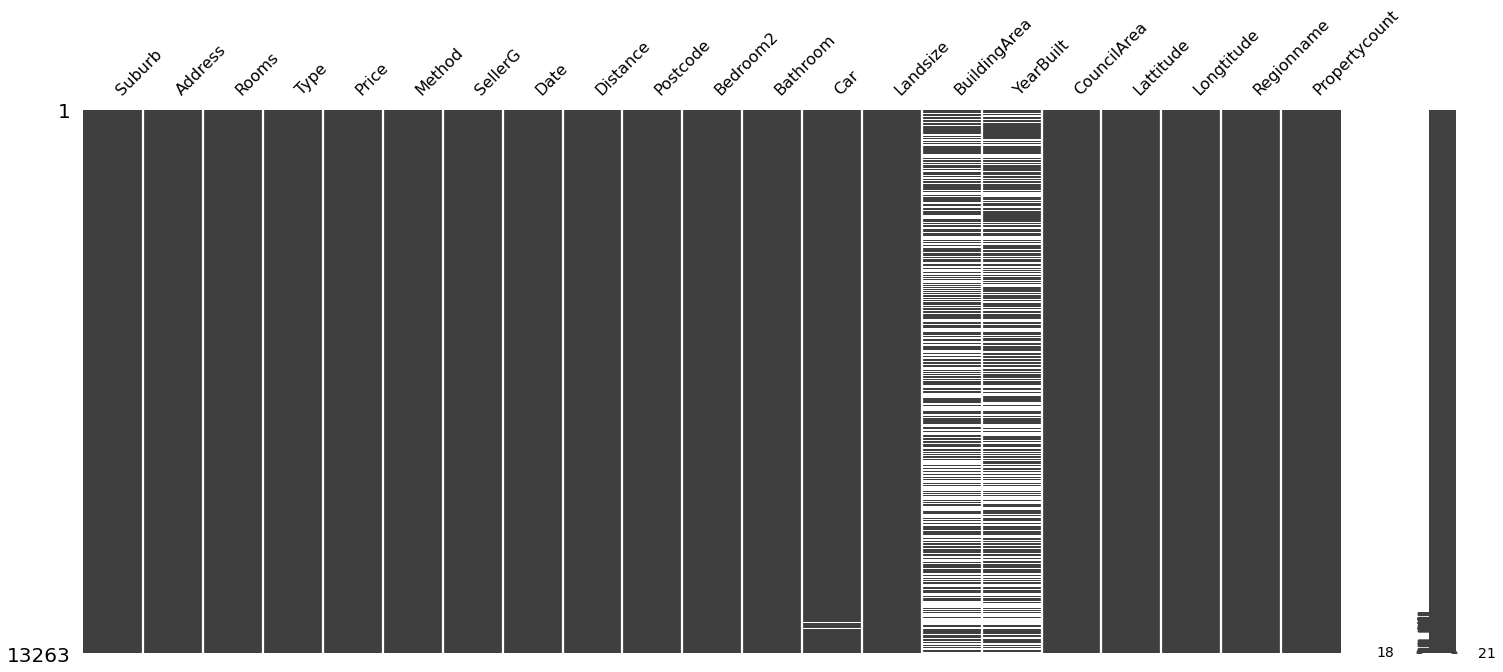

In [28]:
import pandas 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de las columnas/campos más relevantes para determinar el precio de venta:
# Creación de un nuevo DF con la información de Ventas de Melbourne
url = 'https://drive.google.com/file/d/1TTNArP_0BV23Lw-UzDv_bPtf5vmhOQbB/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
ventas_melbourne_df = pandas.read_csv(path)

# ventas_melbourne_df.dtypes

ventas_melbourne_df.describe()
msno.matrix(ventas_melbourne_df)

# BuildingArea y YearBuilt tienen muchos valores faltantes.

### **Elección de los Variables Relevantes**

Como primera medida se tratan de diferente manera las variables categóricas de las variables numéricas:

In [29]:
ventas_melbourne_df.dtypes.sort_values(ascending=False)

Suburb            object
Regionname        object
Type              object
Method            object
SellerG           object
Date              object
CouncilArea       object
Address           object
Landsize         float64
Longtitude       float64
Lattitude        float64
YearBuilt        float64
BuildingArea     float64
Bedroom2         float64
Car              float64
Bathroom         float64
Postcode         float64
Distance         float64
Price            float64
Propertycount    float64
Rooms              int64
dtype: object

### Variables Categóricas:

In [30]:
categories = ventas_melbourne_df.columns[ventas_melbourne_df.dtypes == 'object']

for category in categories:
  print(f'Variable: {category}')
  print(f'Cantidad de valores únicos: {len(ventas_melbourne_df[category].unique())}')
  print(f'Primeros valores: \n{ventas_melbourne_df[category].value_counts().head()}\n')


  #plt.figure(figsize = (20,8))
  #sns.histplot(data=ventas_melbourne_df, x="Price", hue="Method")


Variable: Suburb
Cantidad de valores únicos: 311
Primeros valores: 
Reservoir         351
Richmond          260
Bentleigh East    242
Preston           231
Essendon          218
Name: Suburb, dtype: int64

Variable: Address
Cantidad de valores únicos: 13066
Primeros valores: 
5 Charles St     3
14 Arthur St     3
53 William St    3
5 Margaret St    3
2 Bruce St       3
Name: Address, dtype: int64

Variable: Type
Cantidad de valores únicos: 3
Primeros valores: 
h    9163
u    3005
t    1095
Name: Type, dtype: int64

Variable: Method
Cantidad de valores únicos: 5
Primeros valores: 
S     8809
SP    1667
PI    1534
VB    1161
SA      92
Name: Method, dtype: int64

Variable: SellerG
Cantidad de valores únicos: 266
Primeros valores: 
Nelson           1538
Jellis           1282
hockingstuart    1148
Barry             991
Ray               672
Name: SellerG, dtype: int64

Variable: Date
Cantidad de valores únicos: 58
Primeros valores: 
27/05/2017    473
3/06/2017     395
12/08/2017    387
17/

En la selección de variables categóricas, al no tener mayores precisiones sobre qué información puede ser relevante o no, comenzamos por eliminar la que entendemos que no aporta mucho valor y que podemos descartar sin riesgo.

Así, se eliminan las variables:

*   *Address*: Por tratarse de un valor prácticamente único para cada venta. No permite generalizar para sacar algún dato importante.
*   *Regionname*: Teniendo información geográfica importante con las variables *CouncilArea* y *Suburb*, la region resulta innecesaria.
*   *Date*: La fecha tampoco aporta mucho valor al estudio, ya que son ventas que abarcan sólo los años 2016 y 2017, por lo que no nos permite ver una tendencia a mediana largo plazo.
*   *SellerG*: Finalmente, el vendedor, entendemos, resulta una variable poco relevante para el estudio.

In [31]:
#Borrado de las variables descartadas
drop_columns=['Address','Regionname','Date','SellerG']
ventas_melbourne_df.drop(drop_columns, axis=1, inplace=True)

categories = ventas_melbourne_df.columns[ventas_melbourne_df.dtypes == 'object']
categories

Index(['Suburb', 'Type', 'Method', 'CouncilArea'], dtype='object')

**Variables Categóricas Seleccionadas:**
Tenemos en definitiva dos variables categóricas geográficas, el partido (CouncilArea) y el barrio (Suburb) y por otro lado dos variables con pocas categorías que indican el tipo de propiedad vendida (Type) y el tipo de operación realizada (Method).

### Variables Numéricas:

In [32]:
numericals = ventas_melbourne_df.columns[(ventas_melbourne_df.dtypes == 'int64') | (ventas_melbourne_df.dtypes == 'float64')]
numericals

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

**Correlación de las variables numéricas**

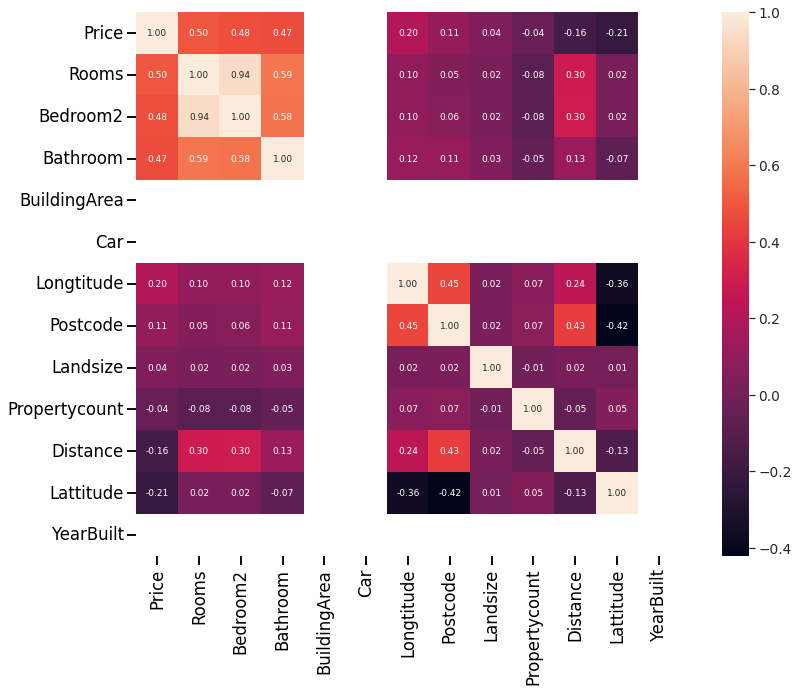

In [33]:
#Correlación
import seaborn as sns
import numpy as np

df_corr = ventas_melbourne_df[numericals]

corrmat = df_corr.corr()
k = len(df_corr.columns) #number of variables for heatmap
f, ax = plt.subplots(figsize=(15, 10))
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

El mapa de calor de las variables numéricas realmente no muestra ninguna variable con un indice de correlación alto. 

En consecuencia graficaremos todas las variables numéricas vs la variable objetivo para explorar las distribuciones en un scatterplot.

**Nota**: Las variables BuildingArea, Car y YearBuilt tienen registros NaN, a eso se debe que el mapa de calor de correlación no muestre resultados. Exploraremos estas variables individualmente más abajo.

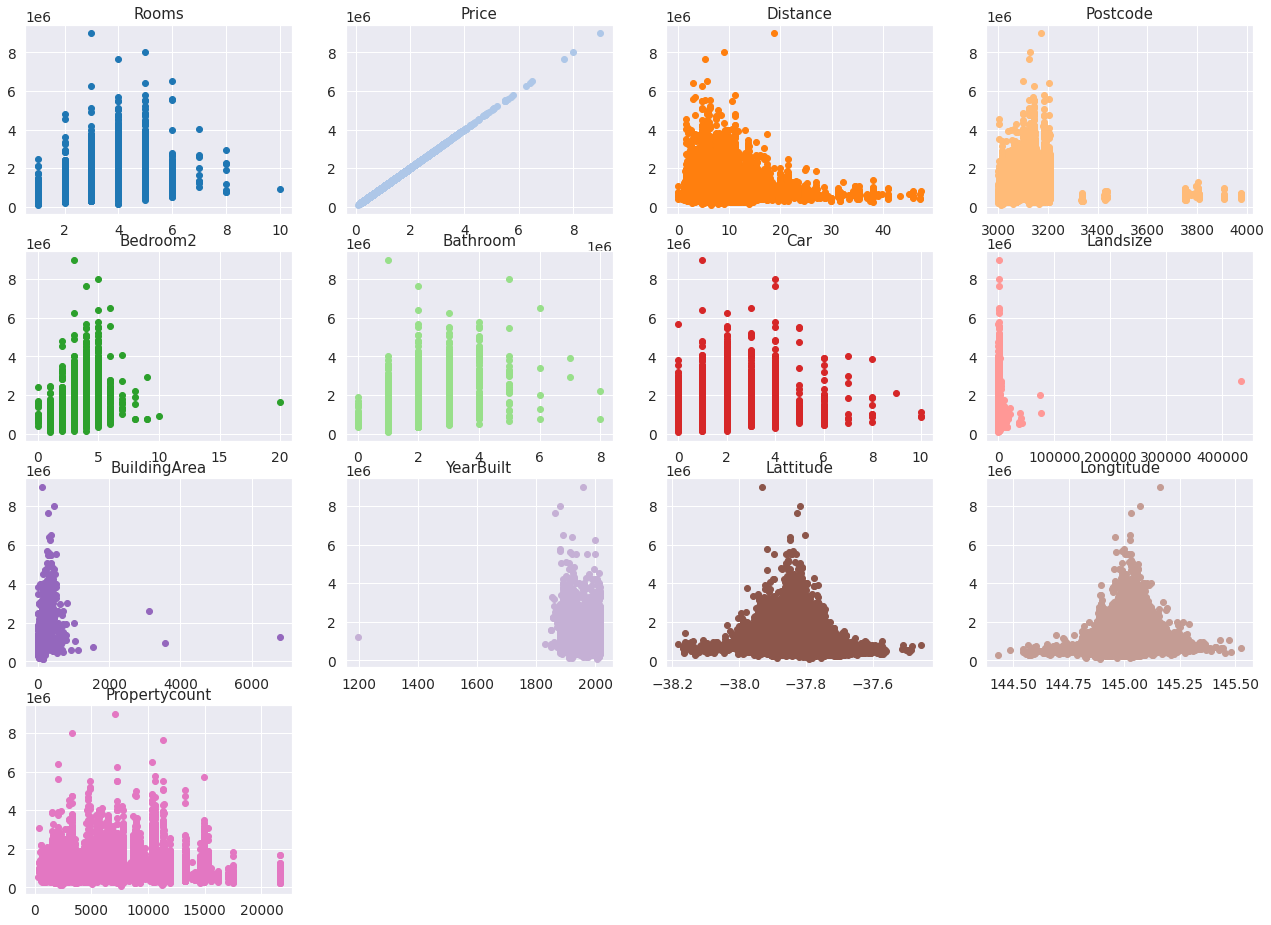

In [34]:
fig = plt.figure(figsize=(22, 16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
colors = plt.get_cmap('tab20').colors

for id, feature, color in zip(range(len(numericals)),numericals,colors):
    mtx = fig.add_subplot(4, 4, id+1)
    mtx.title.set_text(feature)
    mtx.scatter(ventas_melbourne_df[feature], ventas_melbourne_df.Price, color=color)

Con el mismo criterio anterior, empezaremos descartando las variables que entendemos no aportan información relevante.

*   *Lattitude* y *Longtitude*: Al igual que la dirección, es información geográfica que ya utilizamos para completar los datos faltantes de la variable CouncilArea.
*   *PostCode*: Si bien no aporta mucha información, sirve para complementar el dataset con datos provenientes de la base de datos de AirBnb
*   *Propertycount*: A un nivel superficial, no se que haya algún tipo de correlación u orientación con el precio, por lo que se descarta la variable.

In [35]:
#Borrado de las variables descartadas
drop_columns=['Longtitude','Lattitude','Propertycount']
ventas_melbourne_df.drop(drop_columns, axis=1, inplace=True)

numericals = ventas_melbourne_df.columns[(ventas_melbourne_df.dtypes == 'int64') | (ventas_melbourne_df.dtypes == 'float64')]
# Ni el precio ni el código postal se pueden descartar, pero tampoco hacen falta ahora para este gráfico
numericals = numericals.drop(['Price','Postcode'])
numericals

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt'],
      dtype='object')

Imprimimos nuevamente los ScatterPlot para visualizar mejor:

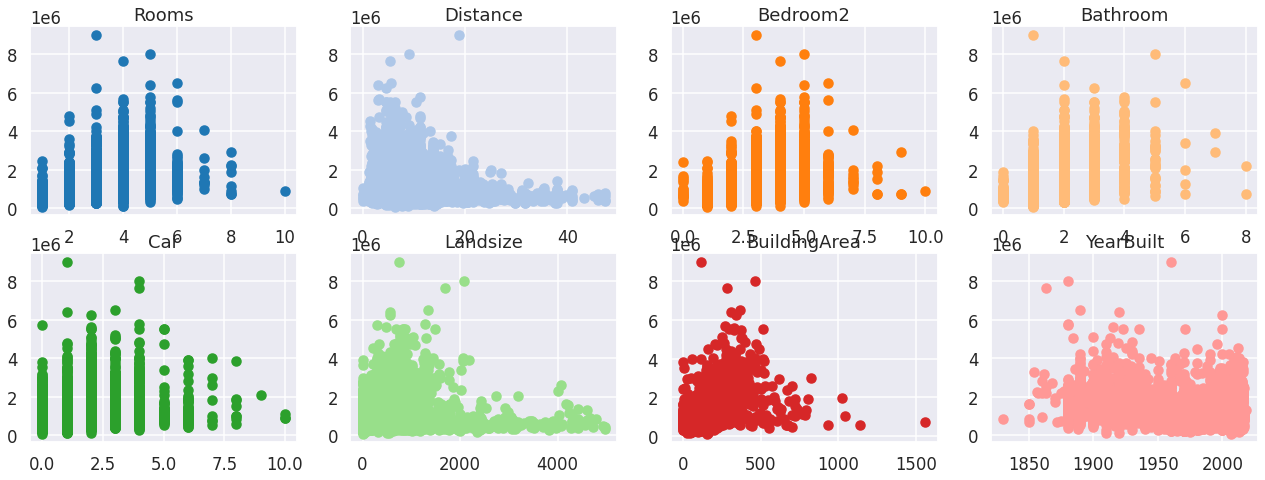

In [91]:
fig = plt.figure(figsize=(22, 16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
colors = plt.get_cmap('tab20').colors

for id, feature, color in zip(range(len(numericals)),numericals,colors):
    mtx = fig.add_subplot(4, 4, id+1)
    mtx.title.set_text(feature)
    mtx.scatter(ventas_melbourne_df[feature], ventas_melbourne_df.Price, color=color)

### Limpieza de Outliers

Antes de terminar la selección de las variables numéricas, eliminaremos los outliers para las variables *Bedroom2*, *Landsize*, *BuildingArea* y *YearBuilt* que, como puede verse en las gráficas, no dejan visualizar si hay alguna tendencia en las observaciones:

**Bedroom2**:

In [38]:
ventas_melbourne_df['Bedroom2'].sort_values()

804       0.0
7385      0.0
8300      0.0
3360      0.0
6170      0.0
         ... 
6915      9.0
379       9.0
4980      9.0
11302    10.0
7404     20.0
Name: Bedroom2, Length: 13263, dtype: float64

In [39]:
ventas_melbourne_df = ventas_melbourne_df[ventas_melbourne_df['Bedroom2'] < 20]

**Landsize**:

In [89]:
ventas_melbourne_df['Landsize'].sort_values()

4000          0.0
7702          0.0
1738          0.0
7698          0.0
5478          0.0
           ...   
11369     40468.0
5194      41400.0
687       75100.0
10503     76000.0
11018    433014.0
Name: Landsize, Length: 13258, dtype: float64

Esta variable muestra valores muy altos por un lado y una gran concentración de valores en 0. Intuitivamente antes de eliminar registros veremos qué pasa con esta variable versus la variable *Type*:

In [90]:
ventas_melbourne_df = ventas_melbourne_df.drop(ventas_melbourne_df[ventas_melbourne_df['Landsize'] > 5000].index)

**YearBuilt**:

In [44]:
ventas_melbourne_df['YearBuilt'].sort_values()

9967     1196.0
2079     1830.0
5405     1850.0
5860     1850.0
2554     1850.0
          ...  
13249       NaN
13250       NaN
13252       NaN
13253       NaN
13257       NaN
Name: YearBuilt, Length: 13262, dtype: float64

In [45]:
ventas_melbourne_df = ventas_melbourne_df.drop(ventas_melbourne_df[ventas_melbourne_df['YearBuilt'] < 1800].index)

**BuildingArea**:

In [86]:
ventas_melbourne_df['BuildingArea'].sort_values()

12240    0.0
13174    0.0
13133    0.0
13125    0.0
13109    0.0
        ... 
13252    NaN
13253    NaN
13257    NaN
13258    NaN
13260    NaN
Name: BuildingArea, Length: 13261, dtype: float64

In [87]:
ventas_melbourne_df = ventas_melbourne_df.drop(ventas_melbourne_df[ventas_melbourne_df['BuildingArea'] > 2000].index)

Imprimos nuevamente los gráficos individualmente para elegir qué variables conservaremos en el dataset.

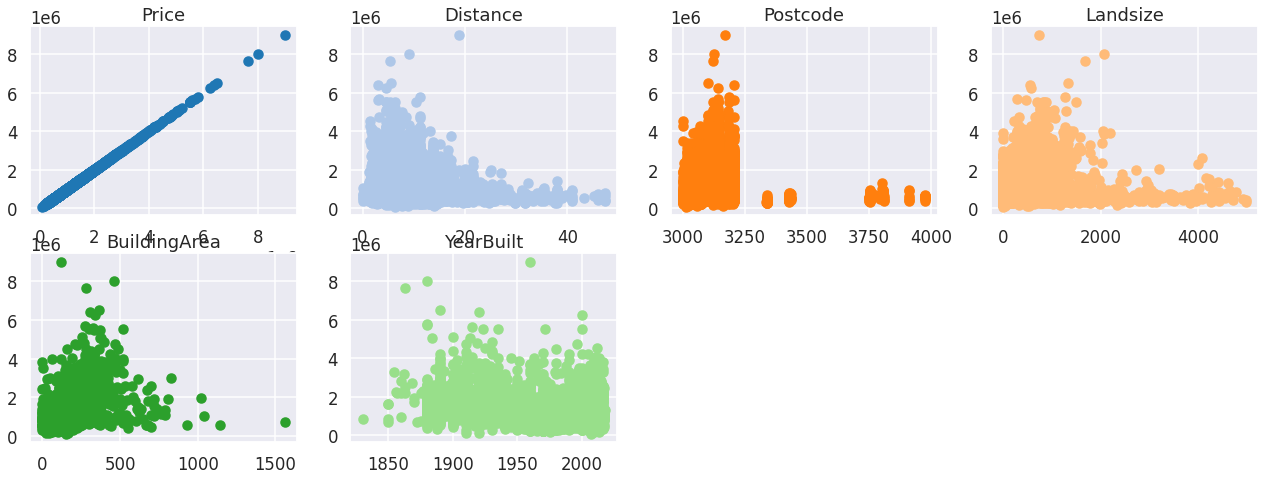

In [179]:
fig = plt.figure(figsize=(22, 16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
colors = plt.get_cmap('tab20').colors

for id, feature, color in zip(range(len(numericals)),numericals,colors):
    mtx = fig.add_subplot(4, 4, id+1)
    mtx.title.set_text(feature)
    mtx.scatter(ventas_melbourne_df[feature], ventas_melbourne_df.Price, color=color)

Las variables *Rooms* y *Bedroom2* tienen un comportamiento muy similar y tienen un índice de correlación de 0.91 (ver heatmap arriba). Por lo que optamos por quedarnos con *Rooms* que tiene mayor correlación con el precio.

Finalmente, y siguiendo el mismo criterio, se descartan las variables Car y Bathrooms.

In [94]:
#Borrado de las variables descartadas
drop_columns=['Bedroom2','Bathroom','Car']
ventas_melbourne_df.drop(drop_columns, axis=1, inplace=True)

numericals = ventas_melbourne_df.columns[ventas_melbourne_df.dtypes.isin(['int64','float64'])]
numericals

Index(['Price', 'Distance', 'Postcode', 'Landsize', 'BuildingArea',
       'YearBuilt'],
      dtype='object')

### **Ejercicio 2.2**

Preparamos el dataset de AirBnb, agrupando los datos por la variable zipcode

In [199]:
# Agrupamiento de los zipcodes y cálculo de principales métricas
zipcodes_df = airbnb_df.groupby(['zipcode']).agg({'price':['count','median','mean','std']}).price.reset_index()

# Eliminamos los valores con menos de 10 muestras
zipcodes_df.drop(zipcodes_df[zipcodes_df['count'] < 10].index, inplace=True)

# Renombro las nuevas variables
zipcodes_df.columns = ['zipcode', 'Airbnb_Qtty', 'Airbnb_Median', 'Airbnb_Mean', 'Airbnb_DevStd']

zipcodes_df.sort_values('Airbnb_Qtty', ascending=False)

,zipcode,Airbnb_Qtty,Airbnb_Median,Airbnb_Mean,Airbnb_DevStd
3,3000.0,3367,129.0,150.504307,189.529766
8,3006.0,1268,150.0,188.851735,196.919689
154,3182.0,1135,118.0,147.729515,150.590741
116,3141.0,881,120.0,157.912599,238.634459
7,3004.0,728,130.0,158.271978,131.771854
...,...,...,...,...,...
152,3180.0,10,67.5,282.500000,605.930552
64,3075.0,10,157.0,142.800000,86.302826
91,3111.0,10,119.0,151.800000,116.305918
228,3911.0,10,225.0,334.600000,341.080701


Hacemos el merge de los dos datasets

In [200]:
# Left merge final, agregando al DF de Melbourne los datos de AirBnb
final_df = pandas.merge(ventas_melbourne_df, zipcodes_df, how='left', left_on=['Postcode'], right_on=['zipcode'])

# Eliminamos el zipcode duplicado
final_df.drop('zipcode', axis=1, inplace=True)

final_df

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Airbnb_Qtty,Airbnb_Median,Airbnb_Mean,Airbnb_DevStd
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,202.0,NaN,NaN,Yarra,258.0,100.0,130.624031,115.267487
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,156.0,79.0,1900.0,Yarra,258.0,100.0,130.624031,115.267487
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,134.0,150.0,1900.0,Yarra,258.0,100.0,130.624031,115.267487
3,Abbotsford,3,h,850000.0,PI,2.5,3067.0,94.0,NaN,NaN,Yarra,258.0,100.0,130.624031,115.267487
4,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,120.0,142.0,2014.0,Yarra,258.0,100.0,130.624031,115.267487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,Wheelers Hill,4,h,1245000.0,S,16.7,3150.0,652.0,NaN,1981.0,Melbourne,189.0,80.0,124.026455,100.772518
13195,Williamstown,3,h,1031000.0,SP,6.8,3016.0,333.0,133.0,1995.0,Melbourne,74.0,180.0,191.094595,128.556919
13196,Williamstown,3,h,1170000.0,S,6.8,3016.0,436.0,NaN,1997.0,Melbourne,74.0,180.0,191.094595,128.556919
13197,Williamstown,4,h,2500000.0,PI,6.8,3016.0,866.0,157.0,1920.0,Melbourne,74.0,180.0,191.094595,128.556919


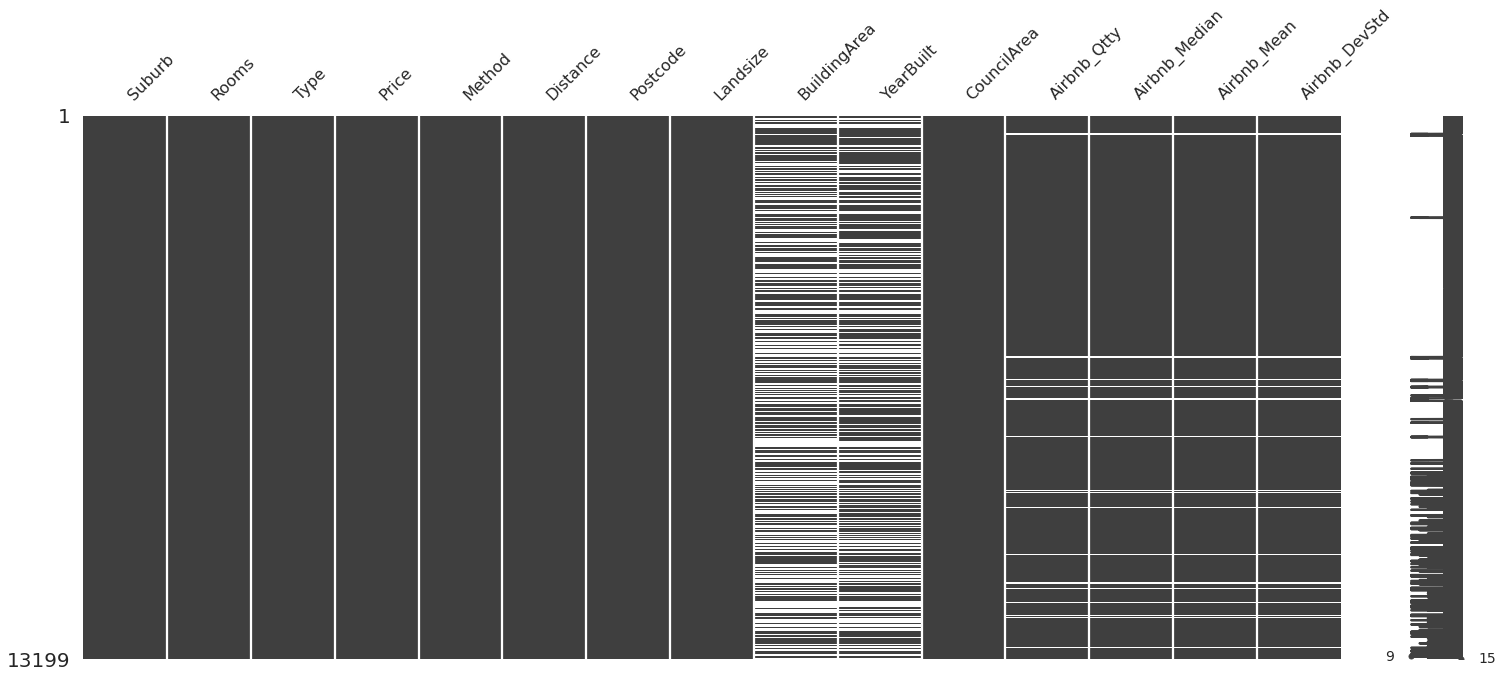

In [201]:
msno.matrix(final_df)

Se imprime finalmente la matrix de missing values, para ver cómo queda el dataframe.

Se observa que hubo algunos zipcodes del dataset original de ventas en Melbourn para los cuales no se pudieron obtener datos de la base de AirBnb. Dejamos estas líneas de cualquier manera porque son datos complementarios.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [202]:
# Generar un archivo .csv con el formato final 
final_df.to_csv('final_df.csv', index=None)
from google.colab import files
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>